In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
import pickle
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier  
import importlib.util
import pickle

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Template", "/home/admin1/PycharmProjects/ML/Week10/Template/template.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
temp = foo.Template()

In [3]:
# read file
df=temp.read_file('Data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
# checks for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# checks for duplicate values
df.duplicated().sum()

0

In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
df = df[['Age','EstimatedSalary','Purchased']]

In [11]:
train,test=temp.split(df,0.3)

In [12]:
print("train",train.shape)
print("test",test.shape)

train (280, 3)
test (120, 3)


In [13]:
# saving datasets into csv filesS
temp.save_csv(test,'test_data.csv')
temp.save_csv(train,'train_data.csv')


In [14]:
# loading training data csv file
train_df = temp.read_file('train_data.csv')
train_df.head()

,Age,EstimatedSalary,Purchased
0,26,17000,0
1,36,52000,0
2,60,46000,1
3,35,25000,0
4,47,43000,0


In [15]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=temp.split(train_df,0.3)

In [16]:
# saving cross validation data into csv file
temp.save_csv(cv_data,'cv_data.csv')

In [17]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,[0,1]].values
y_train=train_data.iloc[:,2].values


In [18]:
# feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
# test=sc.transform(test)

In [19]:
# fit model
classifier = DecisionTreeClassifier(criterion='entropy')  
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_pred = classifier.predict(x_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [21]:
# making confusion matrix
cm= confusion_matrix(y_train,y_pred)
print(cm)

[[126   0]
 [  0  70]]


In [22]:
# loading cross validation dataset file
cv_data = temp.read_file('cv_data.csv')
cv_data.head()

,Age,EstimatedSalary,Purchased
0,33,51000,0
1,41,72000,0
2,35,55000,0
3,48,33000,1
4,58,101000,1


In [23]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,[0,1]].values
y_cv=cv_data.iloc[:,2].values

In [24]:
# feature scaling
x_cv=sc.fit_transform(x_cv)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


train matrix
 [[126   0]
 [  0  70]]
cv matrix
 [[40 13]
 [ 5 26]]
Accuracy of train data = 100.0
Accuracy of test data = 79.67133292757151


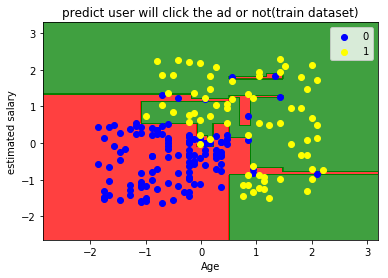

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


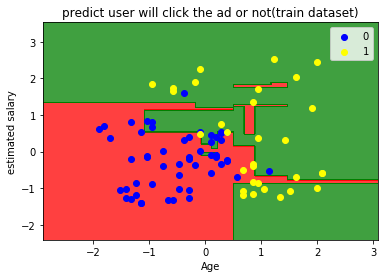

In [25]:
class DecisionTree:
    
    def get_predictions(self,x):        
        # getting prediction values
        y_pred = classifier.predict(x)
        return y_pred
    
    def create_confusion_matrix(self,y,y_pred):
        # making confusion matrix
        cm= confusion_matrix(y,y_pred)
        return cm
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.balanced_accuracy_score(y_train,y_pred)*100
        return Accuracy
        
def main():
    # creates class object 
    obj = DecisionTree()
    y_pred_train = obj.get_predictions(x_train)
    y_pred_test = obj.get_predictions(x_cv)
    
    cm_train=obj.create_confusion_matrix(y_train,y_pred_train)
    print("train matrix\n",cm_train)
    
    cm_cv=obj.create_confusion_matrix(y_cv,y_pred_test)
    print("cv matrix\n",cm_cv)
    
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    
    acc_test = obj.get_accuracy(y_cv,y_pred_test)
    print("Accuracy of test data =",acc_test)
    
    if acc_train >= 70 and acc_test >=  60:
        fileObject = open("train_data.pkl",'wb')
        pickle.dump(classifier,fileObject)   
        pickle.dump(sc,fileObject)
        # here we close the fileObject
        fileObject.close()

    temp.visualization(y_pred_train,x_train,y_train,classifier)
    temp.visualization(y_pred,x_cv,y_cv,classifier)
    
    
    
if __name__ == '__main__':
    main()